# DETECTR 003 Analysis
This notebook is for formatting, analyzing and plotting the DETECTR_003 data. 

## Objective
Illustrate the effects of gRNA, target DNA, and reporter concentrations on RFU_VALUE at 2hr

## Formatting to CSV file
Take txt file from plate reader and turn into tidy data format

In [127]:
#import needed libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [128]:
#read in CSV file
DETECTR_raw = pd.read_csv("DETECTR_003.txt", encoding='utf-16', sep="\t", delimiter="\t",index_col=None, skiprows= 1,header = None)

In [129]:
#drop empty columns - we only had samples in the 2 and 3 columns of the plate
DETECTR_raw = DETECTR_raw.drop(list(range(5,len(DETECTR_raw.columns))), axis=1)

In [130]:
DETECTR_raw.tail(10)

,0,1,2,3,4
2006,NaN,NaN,NaN,0.932,3.036
2007,NaN,NaN,NaN,1.087,1.026
2008,NaN,NaN,NaN,2.331,7.189
2009,NaN,NaN,NaN,0.994,0.991
2010,NaN,NaN,NaN,2.794,18.1
2011,NaN,NaN,NaN,1.145,0.946
2012,NaN,NaN,NaN,1.633,5.18
2013,NaN,NaN,NaN,1.091,0.961
2014,~End,NaN,NaN,NaN,NaN
2015,Original Filename: DETECTR_003; Date Last Save...,NaN,NaN,NaN,NaN


In [132]:
#identify the end of the file
end_indices = DETECTR_raw[0][DETECTR_raw[0]=='~End'].index.tolist()
end_indices[0]

1938

In [133]:
#remove unnecessary colums at the beginning of the file and unnecessary rows at the end of the file
#we want to keep the file with the time information
DETECTR_raw = DETECTR_raw.drop(list(range(end_indices[0], len(DETECTR_raw))), axis = 0)
DETECTR_raw = DETECTR_raw.drop([0,1], axis = 0)
DETECTR_raw = DETECTR_raw.drop([1,2], axis = 1)

In [136]:
#how many plate reads did we have?
len(DETECTR_raw)/16

121.0

In [135]:
#set a variable to identify the number of plate reads
num_plate_reads = int(len(DETECTR_raw)/16)

In [137]:
DETECTR_raw.head(16)

,0,3,4
2,00:00:00,2.948,2.505
3,NaN,3.968,4.328
4,NaN,3.45,2.488
5,NaN,3.346,3.123
6,NaN,2.848,2.26
7,NaN,3.381,2.918
8,NaN,2.876,2.598
9,NaN,3.64,2.897
10,NaN,2.731,2.902
11,NaN,5.06,3.096


In [10]:
#create a dictionary mapping the row number to a letter for 384 and 96
well_dict_384 = {1:"A",2:"B",3:"C",4:"D",5:"E",6:"F",7:"G",8:"H",9:"I",10:"J",11:"K",12:"L",13:"M",14:"N",15:"O",16:"P"}
well_dict_96 = {1:"A",2:"A",3:"B",4:"B",5:"C",6:"C",7:"D",8:"D",9:"E",10:"E",11:"F",12:"F",13:"G",14:"G",15:"H",16:"H"}

In [56]:
#initialize the cleaned data frame
DETECTR_cleaned = pd.DataFrame(columns = ['time','row_384','column_384', 'row_96','column_96','rfu_value'])

0

In [57]:
#iterate over each plate to create a dataframe with the correct time, the 384 and 96 position and the RFU_value
for i in list(range(0,num_plate_reads)):
    time = DETECTR_raw.iloc[i*16,0]
    for j in list(range(2, 4)):
        for k in list(range(i*16, i*16+16)):
            rfu_value = DETECTR_raw.loc[k+2,j+1]
            row_384 = well_dict_384[k%16+1]
            column_384 = j
            row_96 = well_dict_96[k%16+1]
            column_96 = j // 2
            DETECTR_cleaned.loc[len(DETECTR_cleaned)] = [time, row_384, column_384,row_96,column_96,rfu_value]
    

In [58]:
#how many rows in our data frame now? should be 384*number of plates
len(DETECTR_cleaned)

3872

In [43]:
#write this file to a CSV
DETECTR_cleaned.to_csv("DETECTR_003_tidy.csv")

In [59]:
#confirm the shape of our data frame
DETECTR_cleaned.columns

Index(['time', 'row_384', 'column_384', 'row_96', 'column_96', 'rfu_value'], dtype='object')

In [60]:
DETECTR_cleaned.head(10)

,time,row_384,column_384,row_96,column_96,rfu_value
0,00:00:00,A,2,A,1,2.948
1,00:00:00,B,2,A,1,3.968
2,00:00:00,C,2,B,1,3.45
3,00:00:00,D,2,B,1,3.346
4,00:00:00,E,2,C,1,2.848
5,00:00:00,F,2,C,1,3.381
6,00:00:00,G,2,D,1,2.876
7,00:00:00,H,2,D,1,3.64
8,00:00:00,I,2,E,1,2.731
9,00:00:00,J,2,E,1,5.06


## Filter the data frame
Select only wells we are interested in

In [63]:
#only select rows with the 2 hour (final) time point
DETECTR_2hr = DETECTR_cleaned.loc[(DETECTR_cleaned["time"]=="02:00:00") ]

In [67]:
#only select the rows in which we had sample
DETECTR_2hr = DETECTR_2hr.loc[(DETECTR_2hr["row_384"].isin(['A','C','E','G','I','K','M','O']))]

In [69]:
DETECTR_2hr

,time,row_384,column_384,row_96,column_96,rfu_value
3840,02:00:00,A,2,A,1,2.933
3842,02:00:00,C,2,B,1,2.776
3844,02:00:00,E,2,C,1,2.969
3846,02:00:00,G,2,D,1,2.973
3848,02:00:00,I,2,E,1,3.106
3850,02:00:00,K,2,F,1,3.883
3852,02:00:00,M,2,G,1,4.169
3854,02:00:00,O,2,H,1,3.079
3856,02:00:00,A,3,A,1,2.101
3858,02:00:00,C,3,B,1,2.359


In [71]:
#define the experimental set for grouping later on
DETECTR_2hr['experiment_set'] = pd.Series(["gRNA","gRNA","gRNA","gRNA","gRNA","gRNA","gRNA","targetDNA", "reporter","reporter","reporter","reporter","reporter","reporter","reporter","targetDNA"], index = DETECTR_2hr.index)

In [73]:
#define the concentrations from the experimental set up
DETECTR_2hr['concentration'] = pd.Series([0,31.25,62.5,125,250,500,750,1,0,12.5,25,50,125,250,500,10], index = DETECTR_2hr.index)

## Plot the data
Create plots for each experiment set

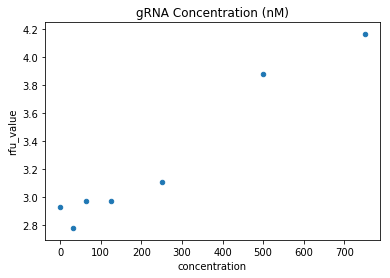

In [106]:
#plot the RFU_value over gRNA concentration
DETECTR_2hr.loc[DETECTR_2hr['experiment_set']=='gRNA'].plot(x = 'concentration', y = 'rfu_value',kind = 'scatter',title = 'gRNA Concentration (nM)')

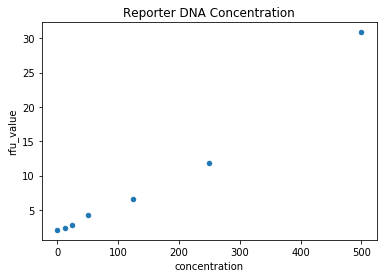

In [105]:
#plot the RFU_value over reporter concentration
DETECTR_2hr.loc[DETECTR_2hr['experiment_set']=='reporter'].plot(x = 'concentration', y = 'rfu_value',kind = 'scatter', title = 'Reporter DNA Concentration (nM)')

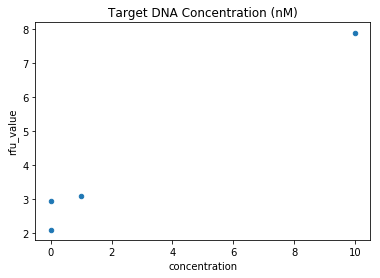

In [104]:
#plot the RFU_value over target DNA concentration
DETECTR_2hr.loc[(DETECTR_2hr['experiment_set']=='targetDNA') | (DETECTR_2hr['concentration']==0)].plot(x = 'concentration', y = 'rfu_value',kind = 'scatter', title = 'Target DNA Concentration (nM)' )

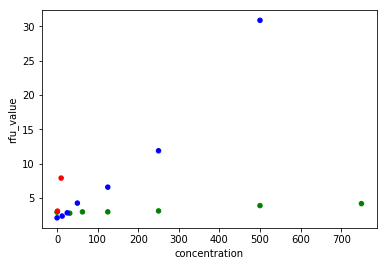

In [126]:
#plot the RFU_value labelling the points with the experiment set they were a part of
#first select colors for each experimental set, then create a new column mapping the experiment set to that column
colors = {'gRNA':'g','reporter':'b', 'targetDNA':'r'}
DETECTR_2hr['colors'] = DETECTR_2hr['experiment_set'].map(colors)
DETECTR_2hr.plot(x = 'concentration', y = "rfu_value", kind = 'scatter', c=DETECTR_2hr['colors'], legend = True)